In [1]:
import wrangle as w
import explore as e
import acquire as a

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import scipy.stats as stats

In [2]:
e.test_sentiment()

In [3]:
df = w.acquire_github_data()
df.shape

(164, 3)

In [4]:
train, validate, test = w.split_data()

In [5]:
train.head()

,repo,language,original,basic_clean,clean,stemmed,lemmatized,word_count,stopword_count,stopword_ratio,compound_sentiment,num_unique,percent_unique
71,./cozodb/cozo,Rust,"<img src=""static/logo_c.png"" width=""200"" heigh...",img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,2320,884,38.10,0.9985,713,30.73
149,./OpenTalker/video-retalking,Python,"<div align=""center"">\n\n<h2>VideoReTalking <br...",div aligncenterh2videoretalking br span stylef...,div aligncenterh2videoretalking br span stylef...,div aligncenterh2videoretalk br span stylefont...,div aligncenterh2videoretalk br span stylefont...,535,145,27.10,0.9766,272,50.84
6,./microsoft/Web-Dev-For-Beginners,JavaScript,[![GitHub license](https://img.shields.io/gith...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,1422,507,35.65,0.9968,450,31.65
162,./ChanseyIsTheBest/NX-60FPS-RES-GFX-Cheats,Python,# NX-60FPS-RES-GFX-Cheats\n\n![fpsdemo1](https...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgit...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,661,256,38.73,-0.9940,245,37.07
91,./datafuselabs/databend,Rust,"<h1 align=""center"">The Future of Cloud Data An...",h1 aligncenterthe future of cloud data analyti...,h1 aligncenterthe future cloud data analyticsh...,h1 aligncenterth futur cloud data analyticsh1d...,h1 aligncenterth futur cloud data analyticsh1d...,778,258,33.16,0.9971,359,46.14


In [6]:
python = train[train.language == 'Python']
java = train[train.language == 'JavaScript']
rust = train[train.language == 'Rust']

In [7]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [8]:
python_words = clean(' '.join(python['basic_clean']))
java_words = clean(' '.join(java['basic_clean']))
rust_words = clean(' '.join(rust['basic_clean']))
all_words = clean(' '.join(train['basic_clean']))

In [9]:
len(python_words), len(java_words), len(rust_words), len(all_words)

(39020, 81381, 39326, 159727)

In [10]:
len(python_words) + len(java_words) + len(rust_words) == len(all_words)

True

In [11]:
python_freq = pd.Series(python_words).value_counts()
java_freq = pd.Series(java_words).value_counts()
rust_freq = pd.Series(rust_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [12]:
all_freqs = pd.concat([python_freq, java_freq, rust_freq, all_freq], 
                      axis=1).fillna(0).astype(int)
all_freqs.columns =['python', 'java', 'rust', 'all']

In [13]:
all_freqs

,python,java,rust,all
closed,554,1,0,555
intern,526,0,0,526
software,479,19,17,515
model,356,26,120,502
engineer,264,75,0,339
...,...,...,...,...
httpsgithubcomsayanarijitxplrxxhpluginprerunzoxide,0,0,1,1
httpsgithubcomxxhxxhpluginprerunzoxidexxh,0,0,1,1
httpsgithubcomxxhxxhzabb,0,0,1,1
httpsgithubcommellbournzabbzoxideel,0,0,1,1


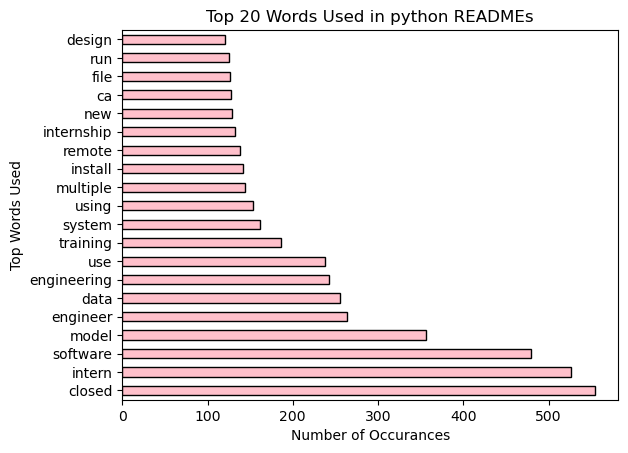

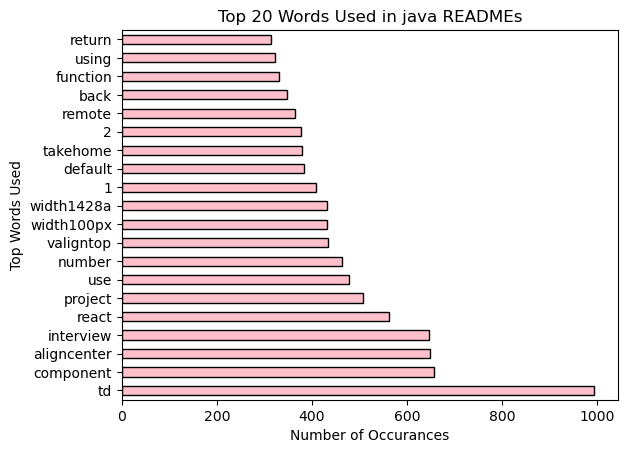

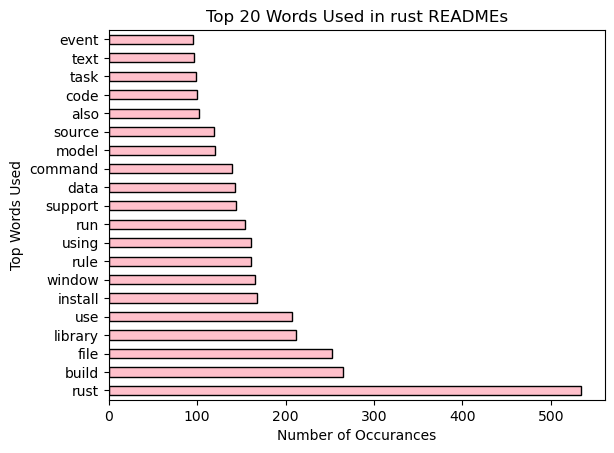

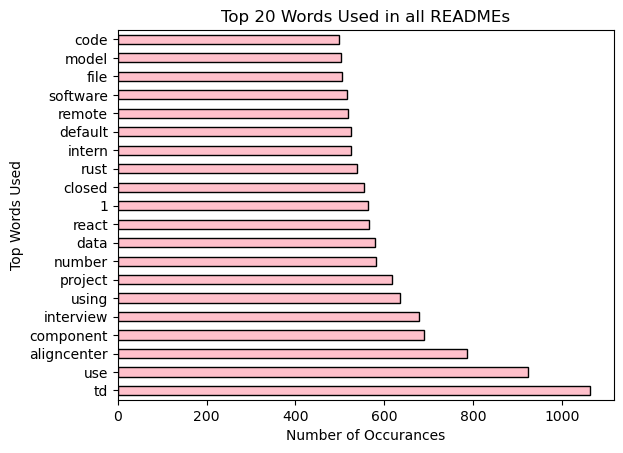

In [14]:
for col in all_freqs.columns:
    all_freqs[col].sort_values(ascending=False).head(20).plot.barh(ec='black', color='pink')
    plt.title(f'Top 20 Words Used in {col} READMEs')
    plt.xlabel('Number of Occurances')
    plt.ylabel('Top Words Used')
    plt.show()

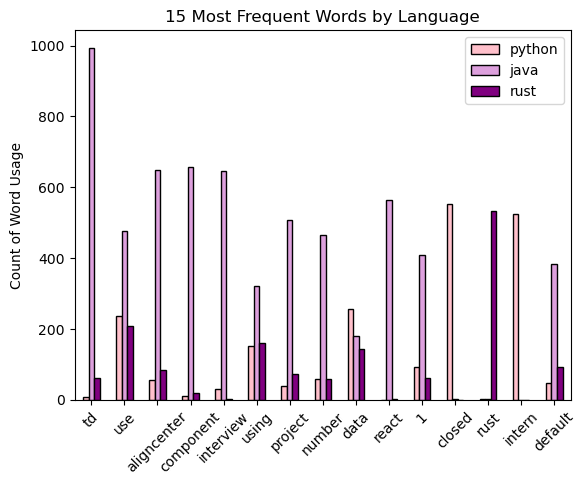

In [15]:
# Visualization of 15 Most Frequently Occurring Words
colors = ['pink', 'plum', 'purple']
all_freqs.sort_values('all', ascending=False)[['python', 'java', 'rust']].head(15).plot.bar(ec='black', color=colors).set(title='15 Most Frequent Words by Language')
plt.ylabel('Count of Word Usage')
plt.xticks(rotation=45)
plt.show()

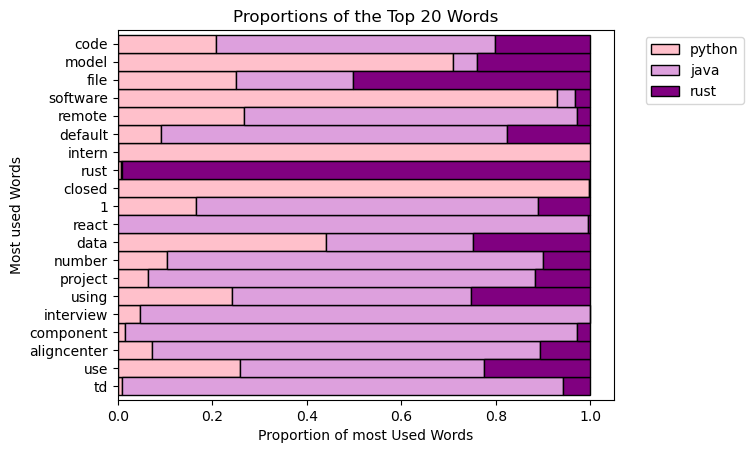

In [16]:
# Visualization of Top 20 Frequently Used Words - Proportionally Calculated

colors = ['pink', 'plum', 'purple']
all_freqs.sort_values('all', ascending=False
                       ).head(20).apply(
    lambda row: row/row['all'], axis=1
)[['python', 'java', 'rust']].plot.barh(
    stacked=True, legend=False, ec='black', 
    width=1, color=colors).set(title='Proportions of the Top 20 Words')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Proportion of most Used Words')
plt.ylabel('Most used Words')
plt.show()

**Takeaway:** Most of the top used words do have even use by all three languages; it seems each word is used heavily by just one word. The excepts to this concept may include the words: "file", "run", "install", "data", "use".

#### Bigrams

In [17]:
# To remove all words which are actaully numbers, I'll run this function

language_words_only = e.get_only_alphabetical_words()

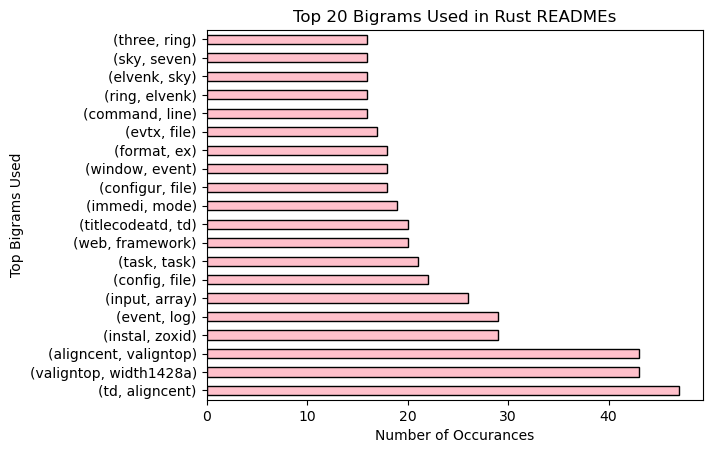

In [18]:
e.viz_rust_bigrams()

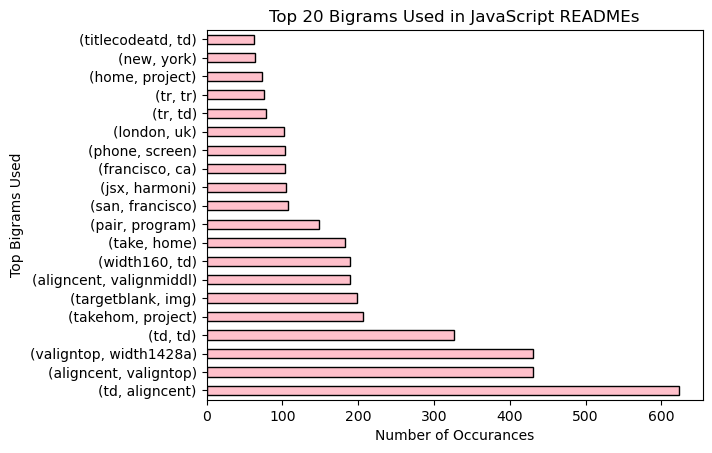

In [19]:
e.viz_java_bigrams()

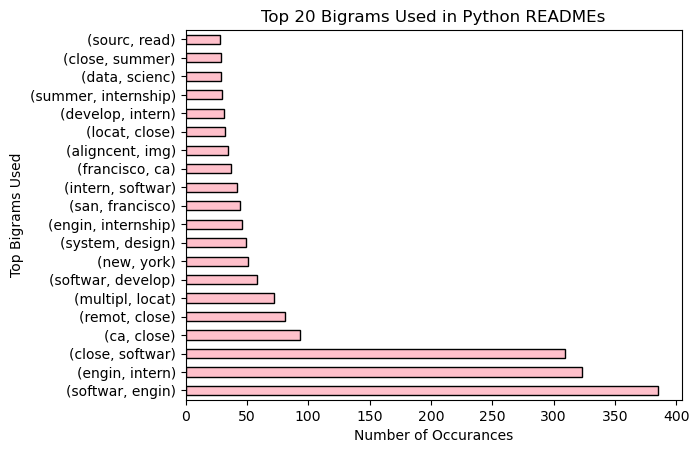

In [20]:
e.viz_python_bigrams()

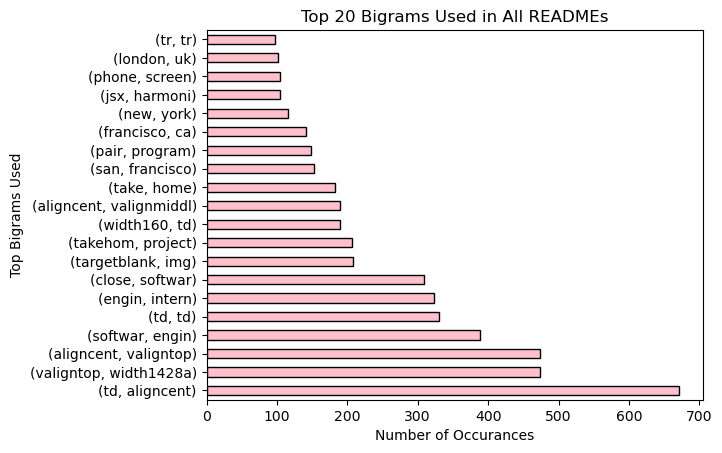

In [21]:
e.viz_all_bigrams()

#### Trigrams

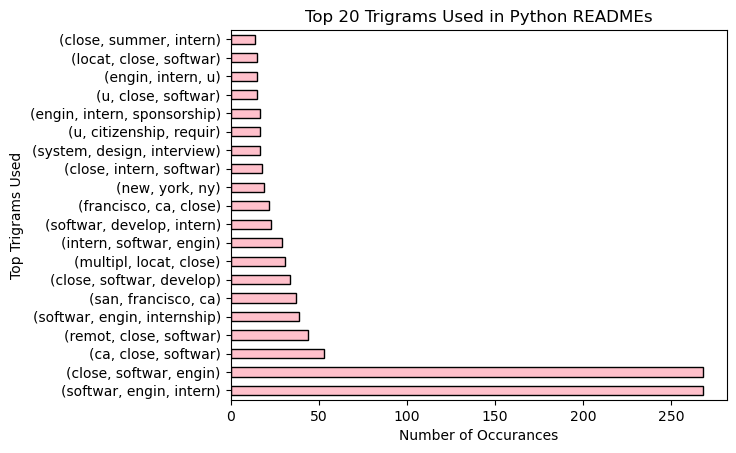

In [22]:
e.viz_python_trigrams()

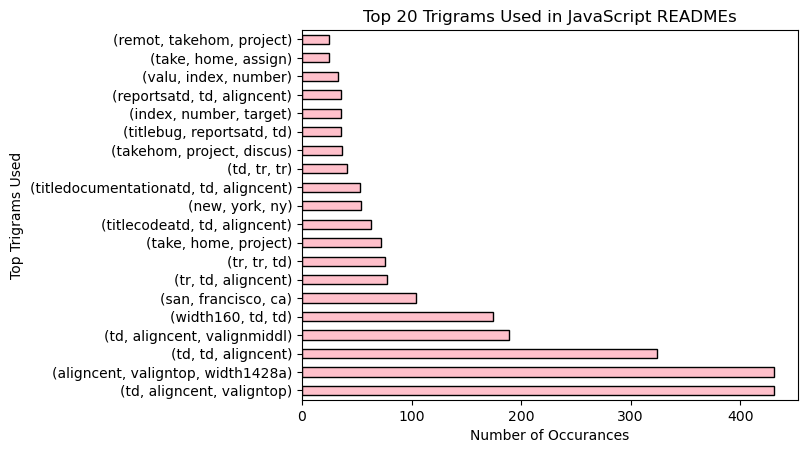

In [23]:
e.viz_java_trigrams()

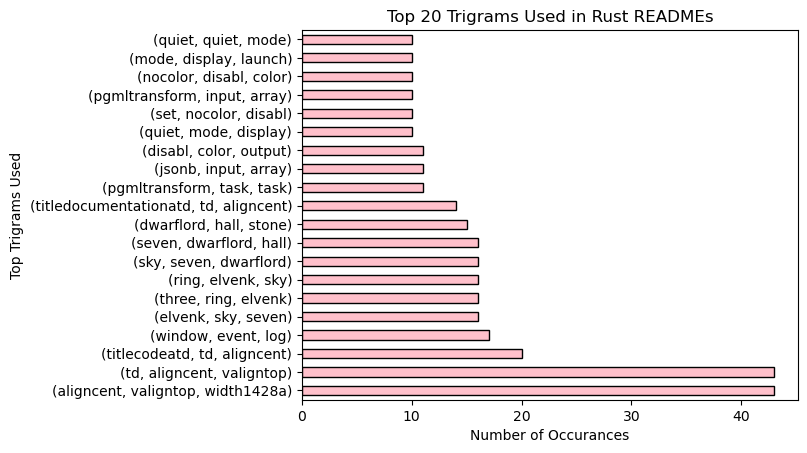

In [24]:
e.viz_rust_trigrams()

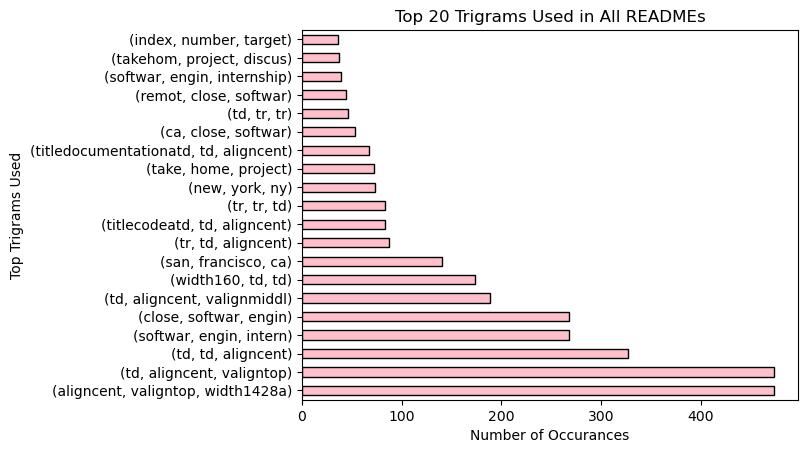

In [25]:
e.viz_all_trigrams()

#### Word Clouds

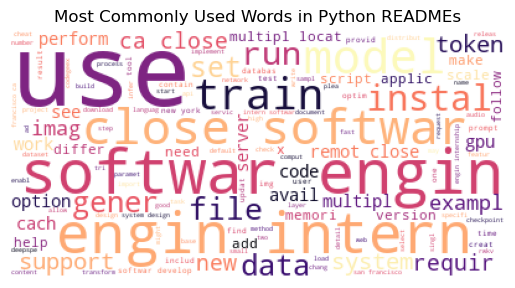

In [26]:
e.viz_python_word_cloud()

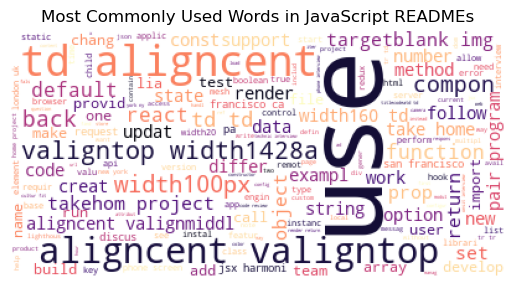

In [27]:
e.viz_java_word_cloud()

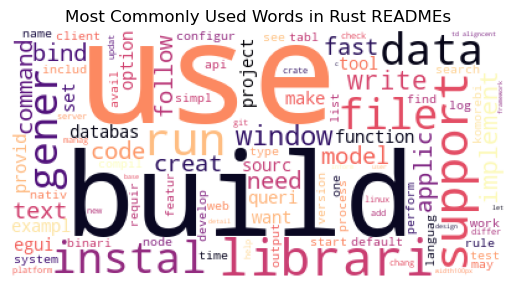

In [28]:
e.viz_rust_word_cloud()

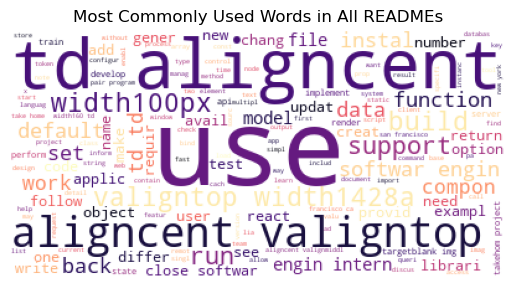

In [29]:
e.viz_all_word_cloud()

#### Sentiment 

In [30]:
# Average sentiment among Python READMEs

train[train['language'] == 'Python'].compound_sentiment.mean()

0.7759281250000001

In [31]:
# Average sentiment among JavaScript READMEs

train[train['language'] == 'JavaScript'].compound_sentiment.mean()

0.9587032258064517

In [32]:
# Average sentiment among Rust READMEs

train[train['language'] == 'Rust'].compound_sentiment.mean()

0.9823142857142859

In [33]:
# Average sentiment among all READMEs

train.compound_sentiment.mean()

0.9016956043956045

**Takeaway:** Sentiment in the Python READMEs is lower than the other two languages

/Users/carolinesmac/codeup-data-science/nlp_team_project/explore.py:227: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_xticklabels(ax[0, 0].get_xticks(), rotation = 45)
/Users/carolinesmac/codeup-data-science/nlp_team_project/explore.py:228: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 1].set_xticklabels(ax[0, 1].get_xticks(), rotation = 45)
/Users/carolinesmac/codeup-data-science/nlp_team_project/explore.py:229: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 0].set_xticklabels(ax[1, 0].get_xticks(), rotation = 45)
/Users/carolinesmac/codeup-data-science/nlp_team_project/explore.py:230: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 1].set_xticklabels(ax[1, 1].get_xticks(), rotation = 45)


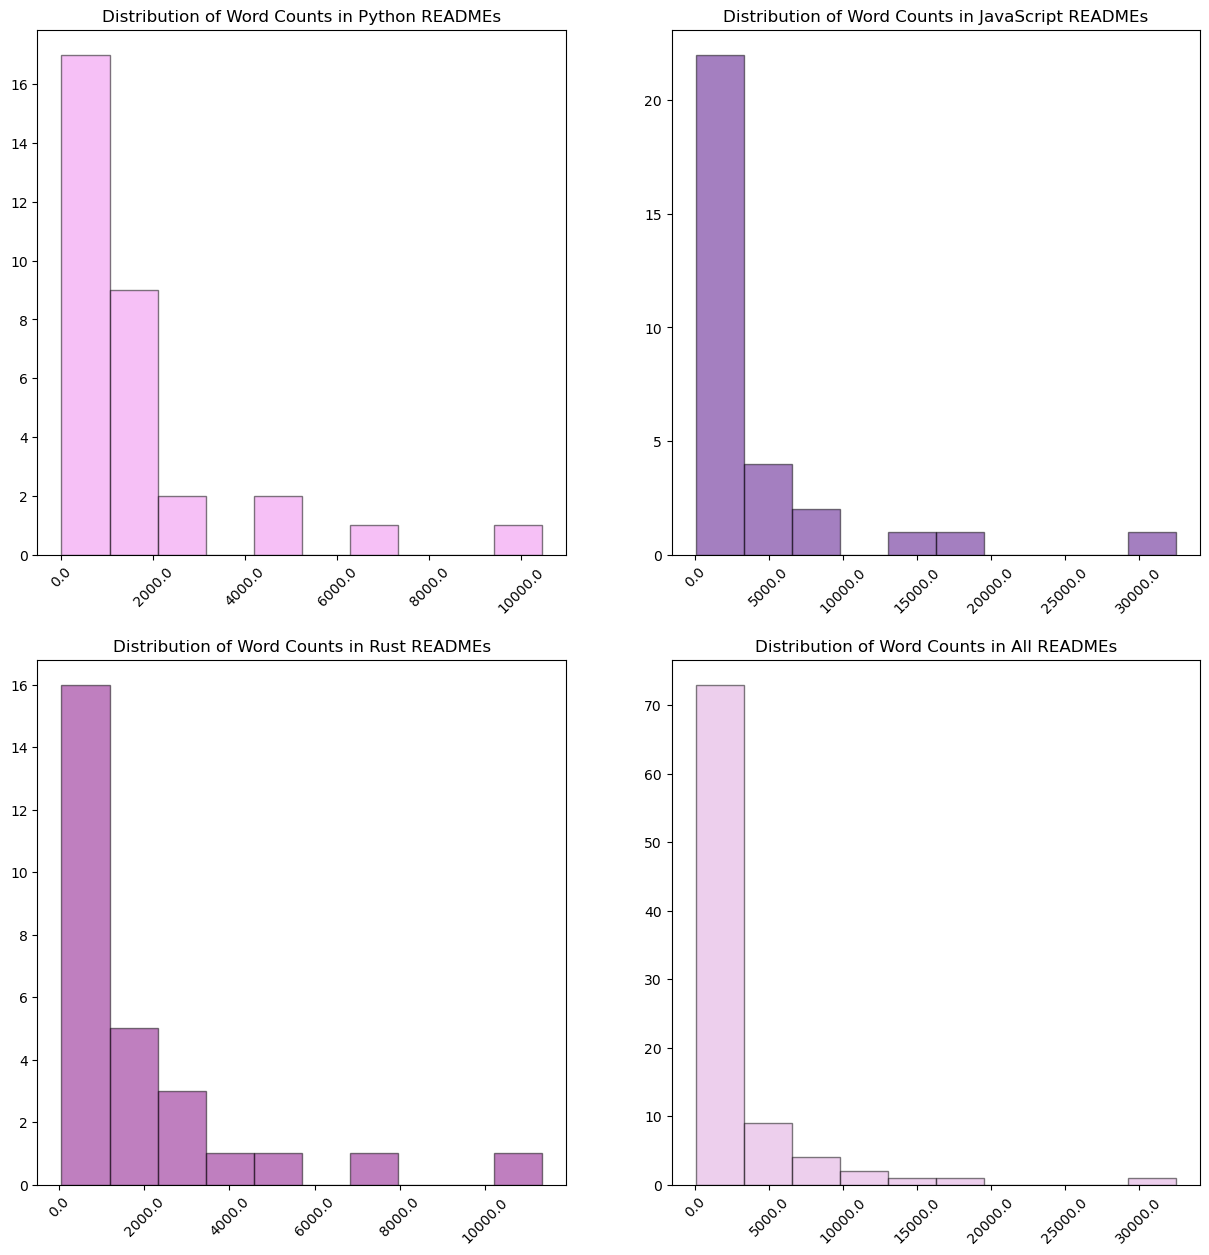

In [34]:
e.viz_word_counts(train)

In [35]:
train.head()

,repo,language,original,basic_clean,clean,stemmed,lemmatized,word_count,stopword_count,stopword_ratio,compound_sentiment,num_unique,percent_unique
71,./cozodb/cozo,Rust,"<img src=""static/logo_c.png"" width=""200"" heigh...",img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,2320,884,38.10,0.9985,713,30.73
149,./OpenTalker/video-retalking,Python,"<div align=""center"">\n\n<h2>VideoReTalking <br...",div aligncenterh2videoretalking br span stylef...,div aligncenterh2videoretalking br span stylef...,div aligncenterh2videoretalk br span stylefont...,div aligncenterh2videoretalk br span stylefont...,535,145,27.10,0.9766,272,50.84
6,./microsoft/Web-Dev-For-Beginners,JavaScript,[![GitHub license](https://img.shields.io/gith...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,1422,507,35.65,0.9968,450,31.65
162,./ChanseyIsTheBest/NX-60FPS-RES-GFX-Cheats,Python,# NX-60FPS-RES-GFX-Cheats\n\n![fpsdemo1](https...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgit...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,661,256,38.73,-0.9940,245,37.07
91,./datafuselabs/databend,Rust,"<h1 align=""center"">The Future of Cloud Data An...",h1 aligncenterthe future of cloud data analyti...,h1 aligncenterthe future cloud data analyticsh...,h1 aligncenterth futur cloud data analyticsh1d...,h1 aligncenterth futur cloud data analyticsh1d...,778,258,33.16,0.9971,359,46.14


/Users/carolinesmac/codeup-data-science/nlp_team_project/explore.py:252: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_xticklabels(ax[0, 0].get_xticks(), rotation = 45)
/Users/carolinesmac/codeup-data-science/nlp_team_project/explore.py:253: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 1].set_xticklabels(ax[0, 1].get_xticks(), rotation = 45)
/Users/carolinesmac/codeup-data-science/nlp_team_project/explore.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 0].set_xticklabels(ax[1, 0].get_xticks(), rotation = 45)
/Users/carolinesmac/codeup-data-science/nlp_team_project/explore.py:255: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 1].set_xticklabels(ax[1, 1].get_xticks(), rotation = 45)


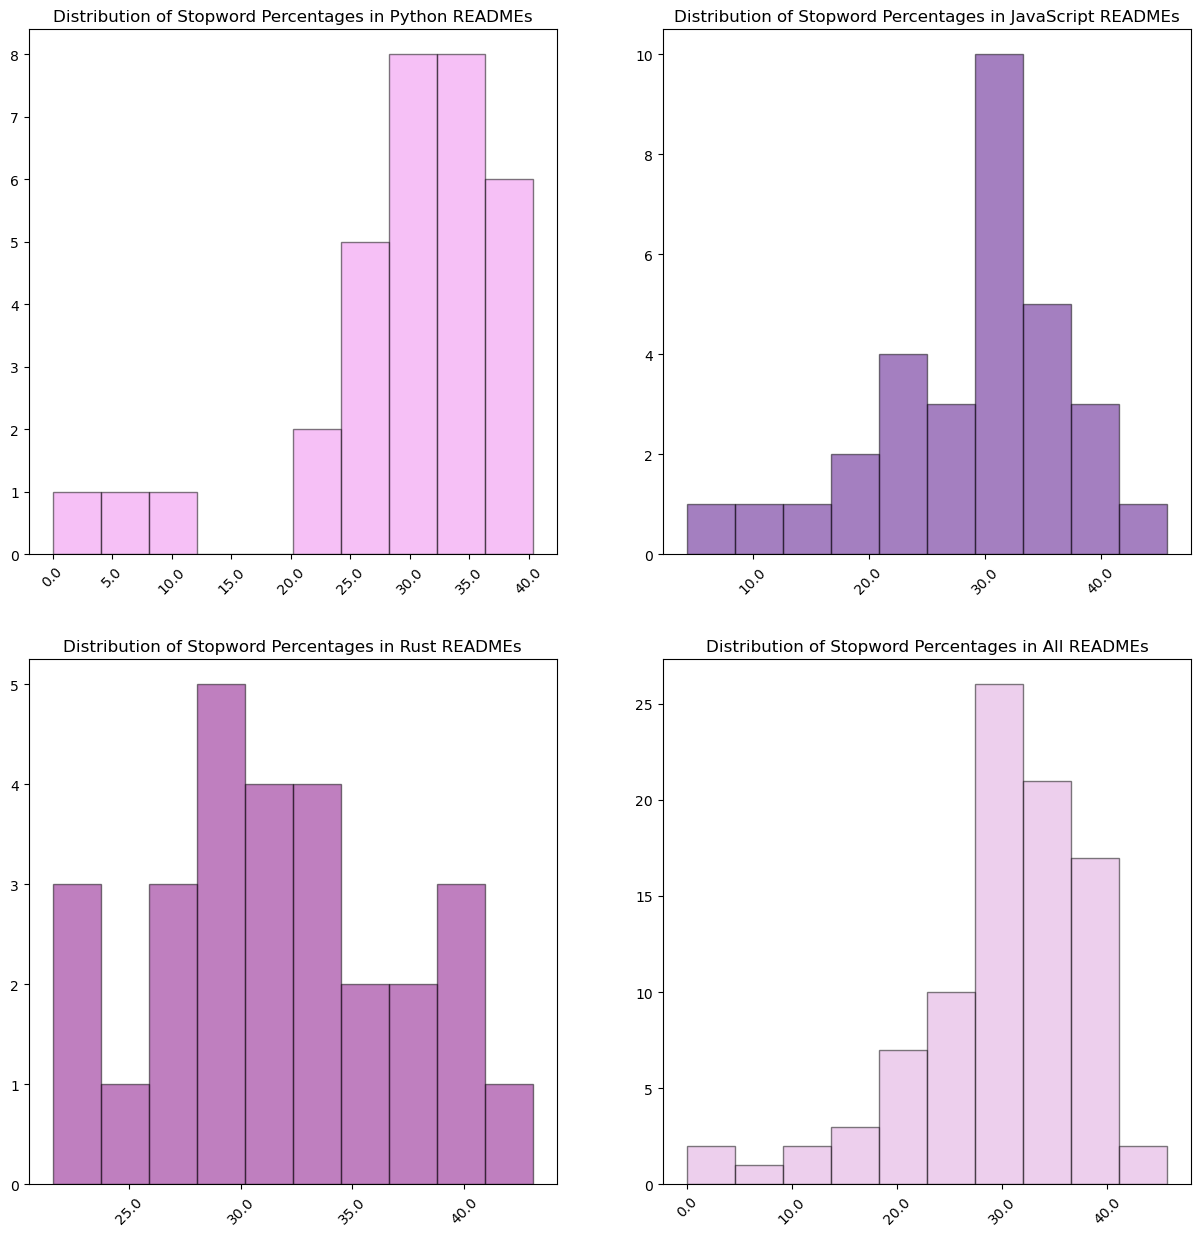

In [36]:
e.viz_stopword_ratios(train)

In [37]:
# e.viz_unique_ratios(train)

In [38]:
train.head()

,repo,language,original,basic_clean,clean,stemmed,lemmatized,word_count,stopword_count,stopword_ratio,compound_sentiment,num_unique,percent_unique
71,./cozodb/cozo,Rust,"<img src=""static/logo_c.png"" width=""200"" heigh...",img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,2320,884,38.10,0.9985,713,30.73
149,./OpenTalker/video-retalking,Python,"<div align=""center"">\n\n<h2>VideoReTalking <br...",div aligncenterh2videoretalking br span stylef...,div aligncenterh2videoretalking br span stylef...,div aligncenterh2videoretalk br span stylefont...,div aligncenterh2videoretalk br span stylefont...,535,145,27.10,0.9766,272,50.84
6,./microsoft/Web-Dev-For-Beginners,JavaScript,[![GitHub license](https://img.shields.io/gith...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,1422,507,35.65,0.9968,450,31.65
162,./ChanseyIsTheBest/NX-60FPS-RES-GFX-Cheats,Python,# NX-60FPS-RES-GFX-Cheats\n\n![fpsdemo1](https...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgit...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,661,256,38.73,-0.9940,245,37.07
91,./datafuselabs/databend,Rust,"<h1 align=""center"">The Future of Cloud Data An...",h1 aligncenterthe future of cloud data analyti...,h1 aligncenterthe future cloud data analyticsh...,h1 aligncenterth futur cloud data analyticsh1d...,h1 aligncenterth futur cloud data analyticsh1d...,778,258,33.16,0.9971,359,46.14


### Hypothesis Testing

In [39]:
python, java, rust = e.train_by_language()

**Question 1:** Are the means of the sentiment values for each language different?

H$_O$: The average sentiment values between Python, JavaScript, and Rust READMEs have equal variance.

H$_A$: The average sentiment values between Python, JavaScript, and Rust READMEs do NOT have equal variance.

In [40]:
α = 0.05

stat, sub_p = stats.levene(python.compound_sentiment, java.compound_sentiment, rust.compound_sentiment)

if sub_p < α:
    print(f'With a p value of {sub_p:.2f}, we can reject the null hypothesis that the means have equal variance')
else:
    print(f'With a p value of {sub_p:.2f}, we fail to reject the null hypothesis, which means that the means do NOT have equal variance')

With a p value of 0.05, we fail to reject the null hypothesis, which means that the means do NOT have equal variance


H$_O$: The average sentiment values between Python, JavaScript, and Rust READMEs are NOT different .

H$_A$: The average sentiment values between Python, JavaScript, and Rust READMEs are different.

In [48]:
α = 0.05

print(stats.alexandergovern(python.compound_sentiment, java.compound_sentiment, rust.compound_sentiment))
print(f'We fail to reject the null hypothesis, which means that the means are different')

AlexanderGovernResult(statistic=4.7223688085241164, pvalue=0.09430845768236518)
We fail to reject the null hypothesis, which means that the means are different


In [46]:
stats.alexandergovern(python.compound_sentiment, java.compound_sentiment, rust.compound_sentiment)

AlexanderGovernResult(statistic=4.7223688085241164, pvalue=0.09430845768236518)

**Question 2:** Are the means of stopword ratios different between Python, JavaScript, and Rust READMEs?

H$_O$: The average percent of stopwords between Python, JavaScript, and Rust READMEs have equal variance.

H$_A$: The average percent of stopwords between Python, JavaScript, and Rust READMEs do NOT have equal variance.

In [ ]:
α = 0.05

stat, sub_p = stats.levene(python.stopword_ratio, java.stopword_ratio, rust.stopword_ratio, center='mean')
print(sub_p)
if sub_p < α:
    print(f'With a p value of {sub_p:.2f}, we can reject the null hypothesis that the means have equal variance')
else:
    print(f'With a p value of {sub_p:.2f}, we fail to reject the null hypothesis, which means that the means do NOT have equal variance')

H$_O$: The average stopword percentages between Python, JavaScript, and Rust READMEs are NOT different .

H$_A$: The average stopword percentages between Python, JavaScript, and Rust READMEs are different.

In [ ]:
α = 0.05

print(stats.alexandergovern(python.stopword_ratio, java.stopword_ratio, rust.stopword_ratio))
print(f'We fail to reject the null hypothesis, which means that the means are different')

In [ ]:
percent_unique

**Question 3:** Are the means of the unique word percentages between Python, JavaScript, and Rust READMEs different?

H$_O$: The average unique word percentages between Python, JavaScript, and Rust READMEs have equal variance.

H$_A$: The average unique word percentages between Python, JavaScript, and Rust READMEs do NOT have equal variance.

In [ ]:
α = 0.05

stat, sub_p = stats.levene(python.percent_unique, java.percent_unique, rust.percent_unique, center='mean')

if sub_p < α:
    print(f'With a p value of {sub_p:.2f}, we can reject the null hypothesis that the means have equal variance')
else:
    print(f'With a p value of {sub_p:.2f}, we fail to reject the null hypothesis, which means that the means do NOT have equal variance')

H$_O$: The average unique word percentages between Python, JavaScript, and Rust READMEs are NOT different .

H$_A$: The average unique word percentages between Python, JavaScript, and Rust READMEs are different.

In [ ]:
α = 0.05

print(stats.alexandergovern(python.percent_unique, java.percent_unique, rust.percent_unique))
print(f'We fail to reject the null hypothesis, which means that the means are different')

**Takeways:** The averages between the three programming languages are all different from each other when considering counts of unique words and stopwords used. Also the sentiment values for these languages are different from each other as well. in all of these statistical tests, the p value was exceedingly higher than the confidence level of 5%. This indicates that the variance within each language is high enough to potentially cause these results.